# Capstone Project

## Overview

If you are planning on going out to see a movie,how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?


## Goal:

Our goal is to complete the tasks below based off the 511 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets. 

In [2]:
# Article link : https://fivethirtyeight.com/features/fandango-movies-ratings/
# Data set link : https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-fandango-dataset

In [3]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Run the cell below to read in the fandango_scrape.csv file

In [5]:
fandango = pd.read_csv("fandango_scrape.csv")

In [6]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0
506,WWE SummerSlam 2015 (2015),0.0,0.0,0
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [8]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [9]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [10]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


###### Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

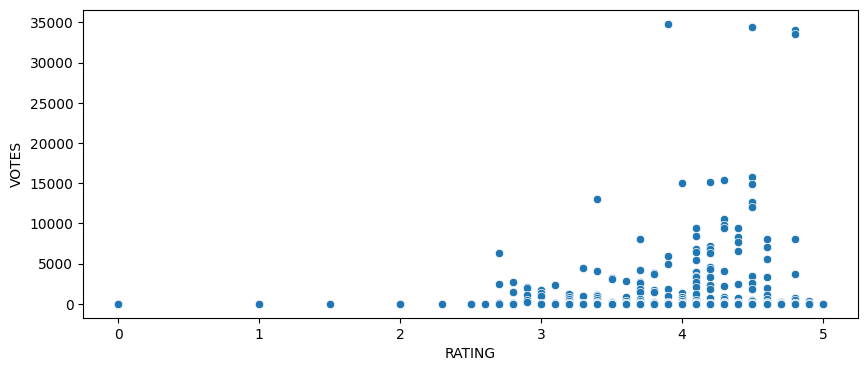

In [38]:
plt.figure(figsize=(10,4),dpi=100)

sns.scatterplot(data=fandango,y='VOTES',x='RATING')

### Calculate the correlation between the columns:

In [19]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


### Create a new column that is able to strip the year from the title strings and set this new column as year

In [20]:
title = 'File Title name (year)'

In [21]:
title.split('(')[-1].replace(')','')

'year'

In [22]:
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [23]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


### How many movies are in the Fandango Dataframe per year?

In [24]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1         7
2016      1
1964      1
Name: YEAR, dtype: int64

### Visualize the count of movies per year with a plot:

<AxesSubplot:xlabel='YEAR', ylabel='count'>

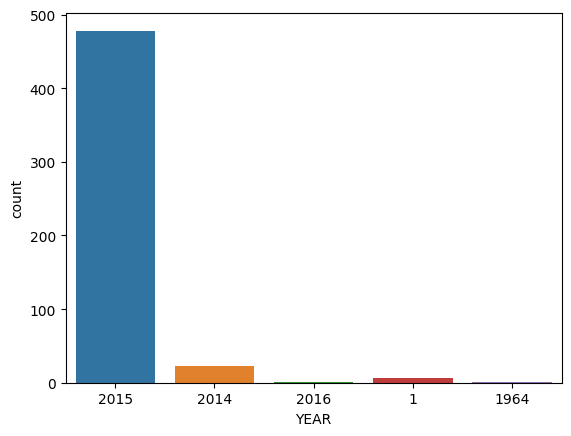

In [25]:
sns.countplot(data=fandango,x='YEAR')

### what are the 10 movies with the highest number of votes?

In [26]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### How many movies have zero votes? 

In [27]:
no_votes= fandango['VOTES']==0

In [28]:
no_votes.sum()

73

In [29]:
## or 
len(fandango[fandango['VOTES']==0])

73

### Create Dataframe of only reviewed films by removing any films  that have zero votes.

In [30]:
fan_reviewed= fandango[fandango['VOTES']>0]

In [31]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


### Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true raitng was from votes(RATING). Clip the KDEs to 0-5. 

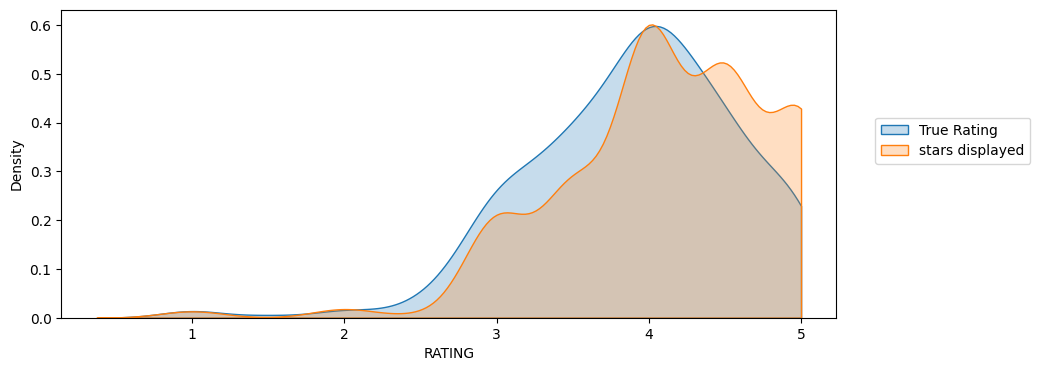

In [37]:
plt.figure(figsize=(10,4),dpi=100)

sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='stars displayed')

plt.legend(loc=(1.05,0.5))

### Let's now actually quantify this discrepancy. Create a new column of the diffrent between STARS displayed versus true RATING .Calculate this diffrence with STARS-RATING and round these diffrences to the nearest decimal point. 

In [39]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\Users\Admin\AppData\Local\Temp\ipykernel_13592\1435696898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [40]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [41]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13592\1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [42]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Create a count plot to display the number of times a certain difference occurs:

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

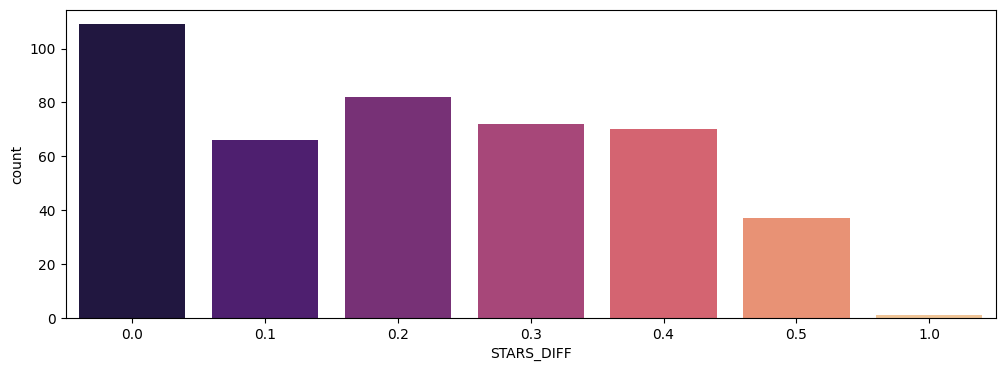

In [45]:
plt.figure(figsize=(12,4),dpi=100)

sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')


### We can from the plot that one movie was displaying over 1 star difference than its true rating! What movie had this close to 1star differential? 

In [46]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part three: Comparison of Fandango Ratings to other Sites
Let'S now compare the scores from Fandango to other movies sites and see how they compare.

### Task: Read in the "fandango_score_comparision.csv" file by running the cell


In [2]:
# imported libraries again because kernel restart 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")

In [5]:
fandango_score_comparison

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


### TASK: Explore the DataFrame columns , info , description

In [6]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [7]:
fandango_score_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [8]:
fandango_score_comparison.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


## Rotten Tomatoes 

Let's first take a look at Rotten Tomatoes.RT has two sets of reviews, their critics reviews (ratings published by official critcs) and user reviews.

### TASK: Create a scatterplot exploring the relationship between RT critic reviews and RT  user reviews.

(0.0, 100.0)

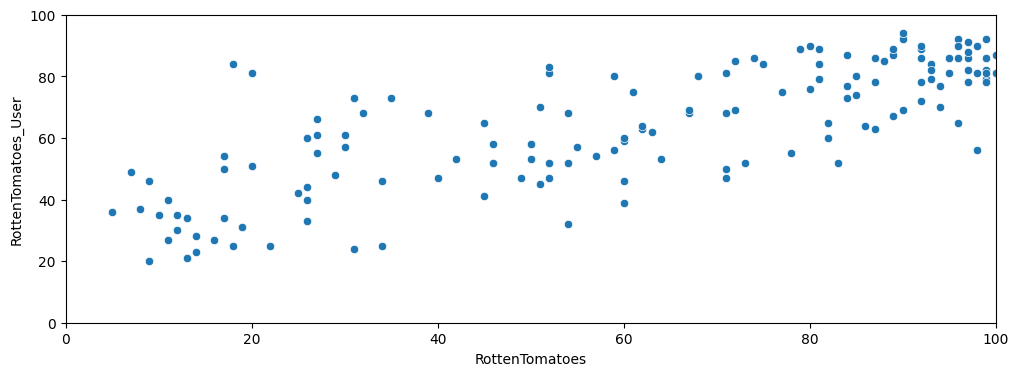

In [12]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=fandango_score_comparison,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

Let's quantify this diffrence by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTotoes-RottenTomatoes_user Note:Rotten_Diff here is critics -user score.So values closer to 0 means aggrement between critics and users. Larger positive values means critics rated much higher than user. Larger negative values means users rated much higher than critics.


### TASK:Create a new based off the diffrence between critics ratings and users raitngsfor Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_user

In [13]:
fandango_score_comparison['Rotten_Diff']=fandango_score_comparison['RottenTomatoes']-fandango_score_comparison['RottenTomatoes']

#### Lets now compare the overall mean difference . Since we are dealing with diffrences that could be negative or positive ,first take the absolute value of all the diffrences , then take the mean. This would report back on average to absolute diffrence between the critics ratings versus the user rating.



## TASK: Calculate the mean absolute difference between RT scores and RT user scores as described above.

In [26]:
fandango_score_comparison['Rotten_Diff'].apply(abs).mean()

0.0

### TASK: Plot the distribution of the diffrences between RT critics score and RT user score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

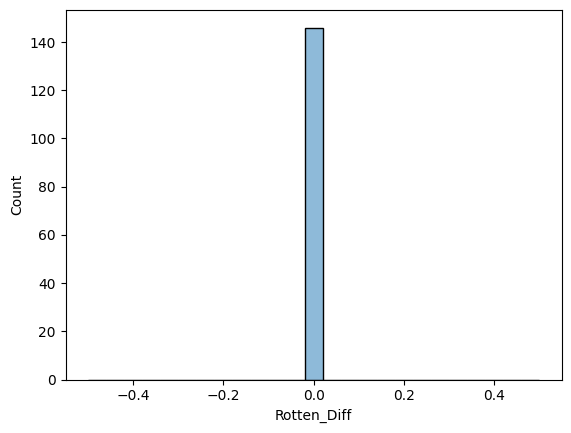

In [25]:
sns.histplot(data=fandango_score_comparison,x='Rotten_Diff',kde=True,bins=25)

In [28]:
## user love but critics hate 

fandango_score_comparison.nsmallest(5,'Rotten_Diff')['FILM']

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object

### TASK:Now the top 5 movies critics scores higher than user on average.

In [29]:
fandango_score_comparison.nlargest(5,'Rotten_Diff')['FILM']

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object

## MetaCritic

Now let's take a quick look at the ratings from MetaCritic.Metacritic also known shown an average user rating versus their official displayed rating.

### TASK: Displayed a scatterplot of the Metacritic Rating versus the metacritic user raing.

(0.0, 100.0)

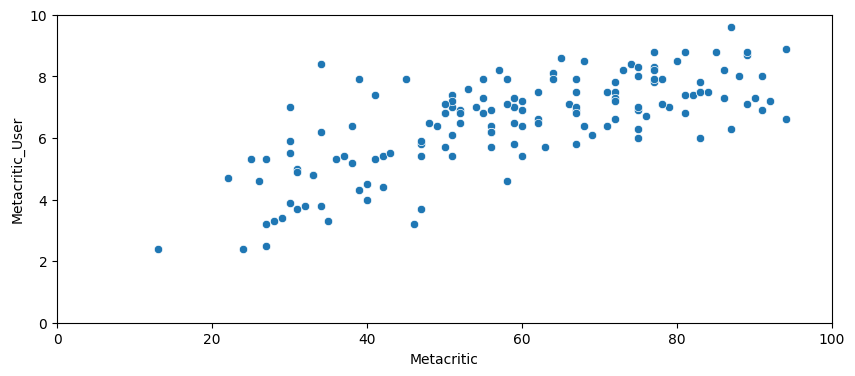

In [31]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=fandango_score_comparison,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts.Let's analyze the most popular movies.

### TASK: Create a scatteplot for the relationship between vote counts on Metacritic versus vote counts on IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

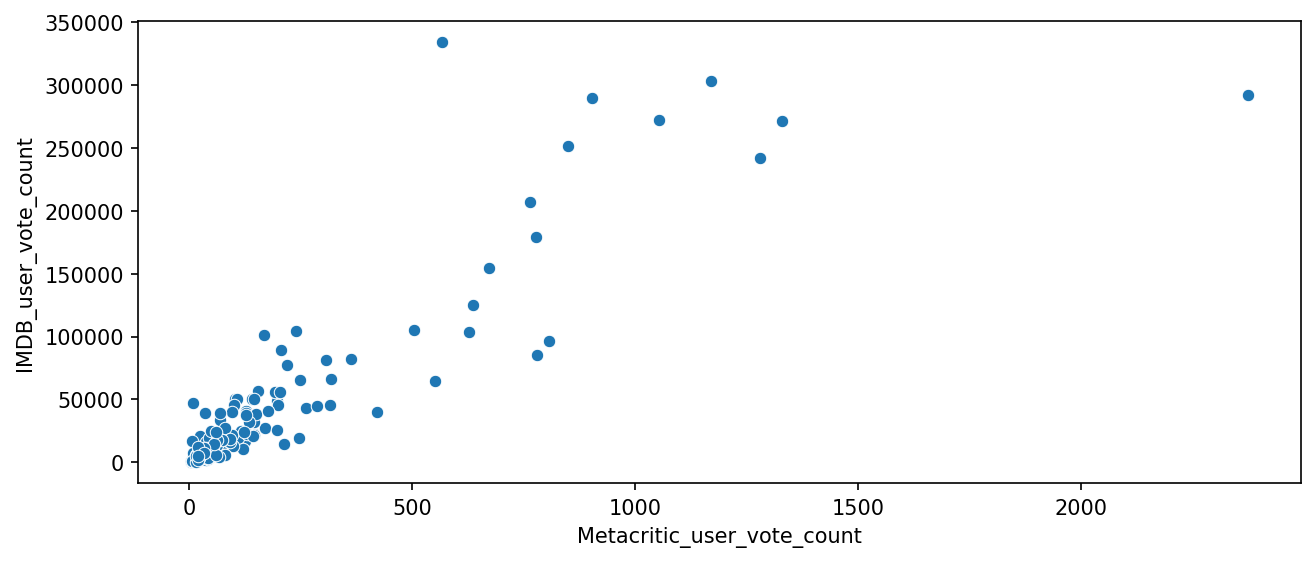

In [32]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango_score_comparison,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

### Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. what is this movie?


### TASK: What movie has the highest IMDB user vote count?

In [33]:
fandango_score_comparison.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,5.0,4.6,4.5,4.6,...,4.5,4.5,3.5,4.0,4.0,566,334164,8055,0.4,0


### TASK: What movie has the highest Metacritic user vote count? 

In [34]:
fandango_score_comparison.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.5,4.3,4.85,4.4,...,5.0,4.5,4.5,4.5,4.0,2375,292023,10509,0.2,0


## Fandango Scores vs All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.


### TASK: Combine the Fandango Table with the All sites table .Not every movie in the Fandango table is in the All sites table ,since some fandango movies have very little or no reviews. We only want to compare movies that are in both dataframe , so do an inner merge together both DataFrame based on the FILM columns.

In [36]:
fandango = pd.read_csv("fandango_scrape.csv")

In [37]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0
506,WWE SummerSlam 2015 (2015),0.0,0.0,0
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [38]:
df= pd.merge(fandango,fandango_score_comparison,on='FILM',how='inner')

In [39]:
df

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,4.0,...,1.5,2.0,2.5,1.5,2.0,778,179506,34846,0.1,0
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,4.5,...,3.5,4.0,3.0,3.5,3.5,1281,241807,34390,0.0,0
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,5.0,...,3.5,4.5,3.5,3.5,3.5,850,251856,34085,0.2,0
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,5.0,...,4.0,4.0,3.5,3.5,3.5,764,207211,33538,0.2,0
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,4.5,...,5.0,4.5,4.5,4.5,4.5,807,96252,15749,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,3.5,...,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0,0
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,4.0,...,5.0,4.0,4.5,3.0,3.5,18,1107,38,0.4,0
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4.5,...,4.5,4.0,3.5,3.5,4.0,4,732,38,0.3,0
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,4.0,...,5.0,4.5,4.5,3.5,3.5,14,696,36,0.1,0


### Normalize columns to Fandango STARS and RATINGS 0-5

In [43]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Fandango_Stars                     5.0
Fandango_Ratingvalue               4.8
RT_norm                            5.0
RT_user_norm                       4.7
Metacritic_norm                    4.7
Metacritic_user_nom                4.8
IMDB_norm                          4.3
RT_norm_round                      5.0
RT_user_norm_round                 4.5
Metacritic_norm_round              4.5
Metacritic_user_norm_round         5.0
IMDB_norm_round                    4.5
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Fandango_votes                 34846.0
Fandango_Difference                0.5
Rotten_Diff                        0.0
Name: max, dtype: float64

In [47]:
import numpy as np
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm']= np.round(df['RottenTomatoes_User']/20,1)

In [49]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_Norm'] = np.round(df['Metacritic_User']/20,1)

In [50]:
df['IMDB_Norm']=np.round(df['IMDB']/2,1)

In [51]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,...,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,4.0,...,2.0,778,179506,34846,0.1,0,1.2,2.1,0.2,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,4.5,...,3.5,1281,241807,34390,0.0,0,3.6,4.0,0.4,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,5.0,...,3.5,850,251856,34085,0.2,0,3.6,4.2,0.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,5.0,...,3.5,764,207211,33538,0.2,0,4.0,4.2,0.3,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,4.5,...,4.5,807,96252,15749,0.0,0,4.9,4.5,0.4,4.3


### TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and Rating from the original fandango table.

In [52]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm',
       'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round',
       'RT_user_norm_round', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes',
       'Fandango_Difference', 'Rotten_Diff', 'RT_Norm', 'RTU_Norm',
       'Meta_Norm', 'IMDB_Norm'],
      dtype='object')

In [54]:
norm_scores = df[['RT_Norm', 'RTU_Norm','IMDB_Norm']]

In [56]:
norm_scores.head()

,RT_Norm,RTU_Norm,IMDB_Norm
0,1.2,2.1,2.1
1,3.6,4.0,3.6
2,3.6,4.2,3.7
3,4.0,4.2,3.7
4,4.9,4.5,4.3


### Comparing distribution of scores across sites

<AxesSubplot:ylabel='Density'>

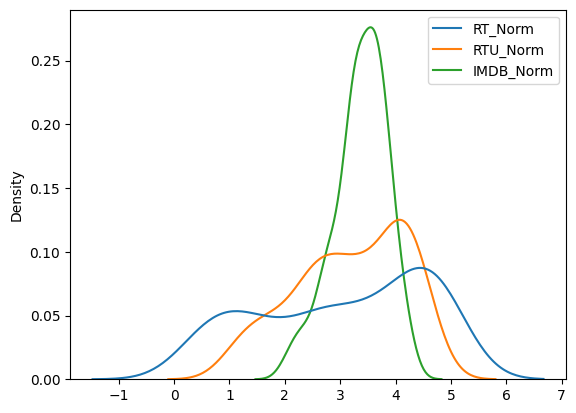

In [57]:
sns.kdeplot(data=norm_scores)

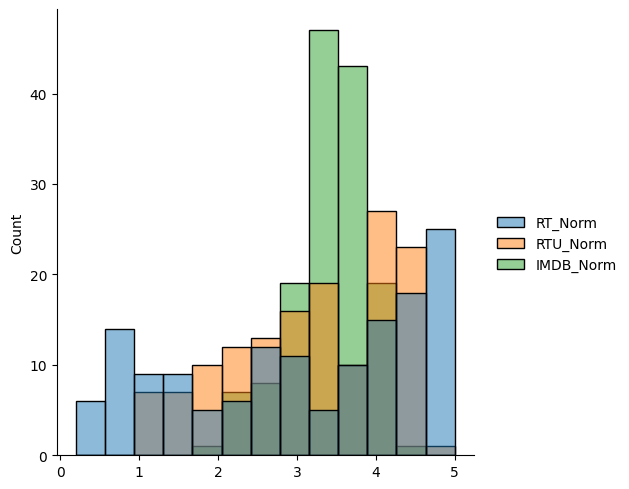

In [58]:
sns.displot(data=norm_scores)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17404\1896223416.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')


<AxesSubplot:ylabel='Density'>

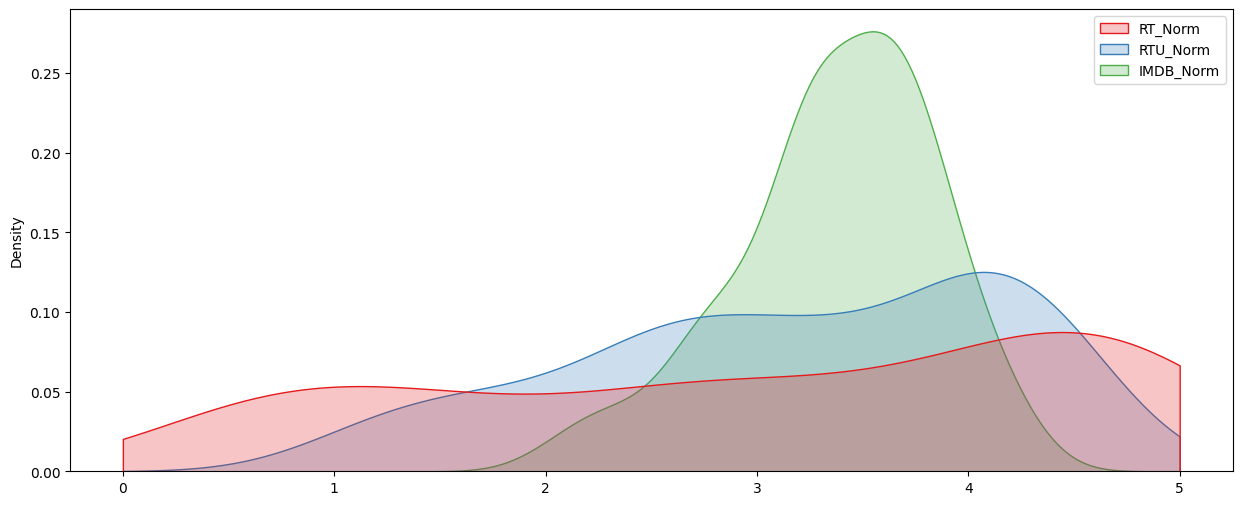

In [59]:
plt.figure(figsize=(15,6),dpi=100)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

### How are the worst movies rated across all platforms?

#### TASK: Create a clustermap visualization of all normalized scores. Note the diffrence in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap doesnot need to have the FILM titles as the index, feel to drop it for the clustermap.

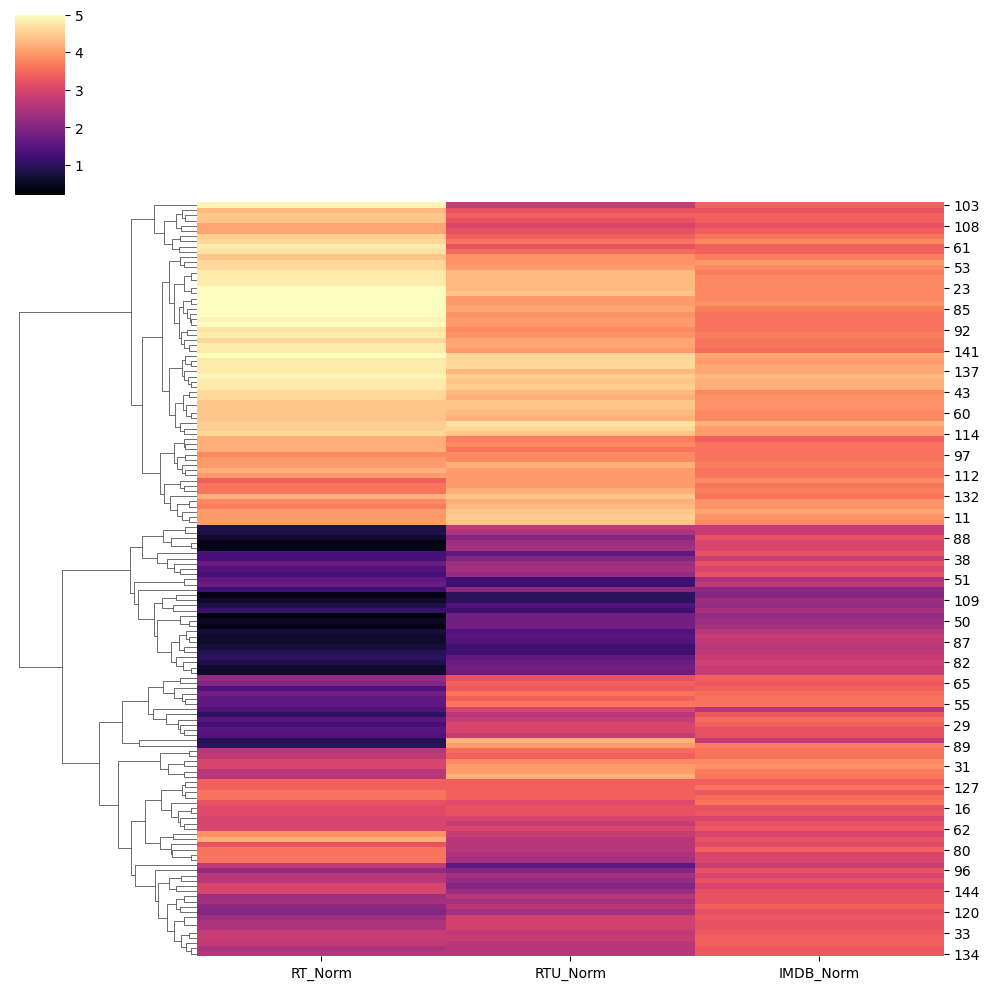

In [61]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)